## Problem Statement

Given a dataset containing 12,000 images, create a Neural Network model to predict whether a person is wearing a Mask or not

## Importing the required libraries

In [2]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16

In [3]:
print(os.listdir('../input/face-mask-12k-images-dataset/Face Mask Dataset/'))

['Validation', 'Test', 'Train']


## Paths for Train & Test directories

In [4]:
train_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Train'
test_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Test'
val_dir = '../input/face-mask-12k-images-dataset/Face Mask Dataset/Validation'

## Generating extra data from the existing data by using Data Augmentation

In [5]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

In [6]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = val_datagen.flow_from_directory(val_dir,
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 800 images belonging to 2 classes.


## Model Building (Transfer Learning : VGG16)

In [7]:
# Only including the Convolutional layers and ignoring the further Dense layers 
# (as our application differs from the one the model was trained upon)

conv_base = VGG16(include_top=False, input_shape=(150,150,3))

58892288/58889256 [==============================] - 0s 0us/step


In [8]:
# Not training the already trained Convolutional layers from the Pre-trained model
for layer in conv_base.layers:
    layer.trainable = False

In [9]:
# Model with Convolutional Base = VGG16 & Classifier = Custom made
model = models.Sequential([
                           conv_base,
                           layers.Flatten(),
                           layers.Dropout((0.3)),
                           layers.Dense(512, activation='relu'),
                           layers.BatchNormalization(),
                           layers.Dense(256, activation='relu'),
                           layers.Dense(1, activation='sigmoid')
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dropout (Dropout)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               4194816   
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 2

In [11]:
model.compile(tf.keras.optimizers.Adam(learning_rate=2e-5),
              tf.keras.losses.binary_crossentropy,
              metrics=['accuracy'])

In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

## Training

In [13]:
history = model.fit(train_generator,
                             steps_per_epoch=313,
                             epochs=20,
                             validation_data=validation_generator,
                            validation_steps=25,
                           callbacks=[callback])

model.save('face-mask-detection.h5')

Epoch 1/20
313/313 [==============================] - 519s 2s/step - loss: 0.5437 - accuracy: 0.7186 - val_loss: 0.1797 - val_accuracy: 0.9350
Epoch 2/20
313/313 [==============================] - 503s 2s/step - loss: 0.1924 - accuracy: 0.9263 - val_loss: 0.1168 - val_accuracy: 0.9538
Epoch 3/20
313/313 [==============================] - 503s 2s/step - loss: 0.1353 - accuracy: 0.9516 - val_loss: 0.0932 - val_accuracy: 0.9675
Epoch 4/20
313/313 [==============================] - 503s 2s/step - loss: 0.1078 - accuracy: 0.9571 - val_loss: 0.0748 - val_accuracy: 0.9750
Epoch 5/20
313/313 [==============================] - 503s 2s/step - loss: 0.1097 - accuracy: 0.9568 - val_loss: 0.0655 - val_accuracy: 0.9825
Epoch 6/20
313/313 [==============================] - 503s 2s/step - loss: 0.0993 - accuracy: 0.9630 - val_loss: 0.0638 - val_accuracy: 0.9787
Epoch 7/20
313/313 [==============================] - 503s 2s/step - loss: 0.0917 - accuracy: 0.9654 - val_loss: 0.0540 - val_accuracy: 0.9850

In [14]:
history.history

{'loss': [0.366242378950119,
  0.16967558860778809,
  0.1302689015865326,
  0.1096075102686882,
  0.1106584444642067,
  0.09628956764936447,
  0.09450710564851761,
  0.09261231124401093,
  0.0859542265534401,
  0.08412144333124161,
  0.08283233642578125,
  0.07877734303474426,
  0.07839927077293396,
  0.07323455810546875,
  0.07529361546039581,
  0.06994841992855072,
  0.07196415215730667,
  0.0772177129983902,
  0.07148420065641403],
 'accuracy': [0.8306000232696533,
  0.9368000030517578,
  0.953000009059906,
  0.9574999809265137,
  0.9567000269889832,
  0.9660999774932861,
  0.9641000032424927,
  0.9648000001907349,
  0.9693999886512756,
  0.9706000089645386,
  0.9702000021934509,
  0.9702000021934509,
  0.970300018787384,
  0.9718999862670898,
  0.9731000065803528,
  0.9728999733924866,
  0.9742000102996826,
  0.9703999757766724,
  0.972599983215332],
 'val_loss': [0.17974023520946503,
  0.1168229877948761,
  0.09315583854913712,
  0.07478833198547363,
  0.06553664058446884,
  0.063

## Results

In [15]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

In [16]:
print(f'Training Accuracy : {sum(acc)/len(acc)}')
print(f'Training Loss : {sum(loss)/len(loss)}')
print(f'Validation Accuracy : {sum(val_acc)/len(val_acc)}')
print(f'Validation Loss : {sum(val_loss)/len(val_loss)}')

Training Accuracy : 0.9587052621339497
Training Loss : 0.10626784672862605
Validation Accuracy : 0.9775657936146385
Validation Loss : 0.06526503143341918


In [17]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary',
)

Found 992 images belonging to 2 classes.


In [18]:
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss : {test_loss} \n Test Accuracy : {test_acc}")

31/31 [==============================] - 46s 1s/step - loss: 0.0132 - accuracy: 0.9960
Test Loss : 0.013159484602510929 
 Test Accuracy : 0.9959677457809448


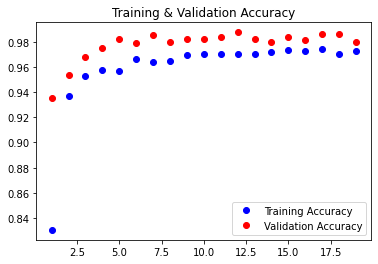

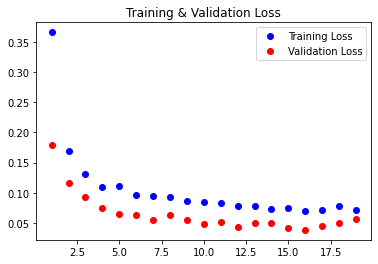

In [19]:
plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'ro', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show() 